<a href="https://colab.research.google.com/github/jpengtelecom/Depend-ncias-de-dos-par-metros-de-_r-da-Ferrita/blob/main/GraficoApendiceH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib

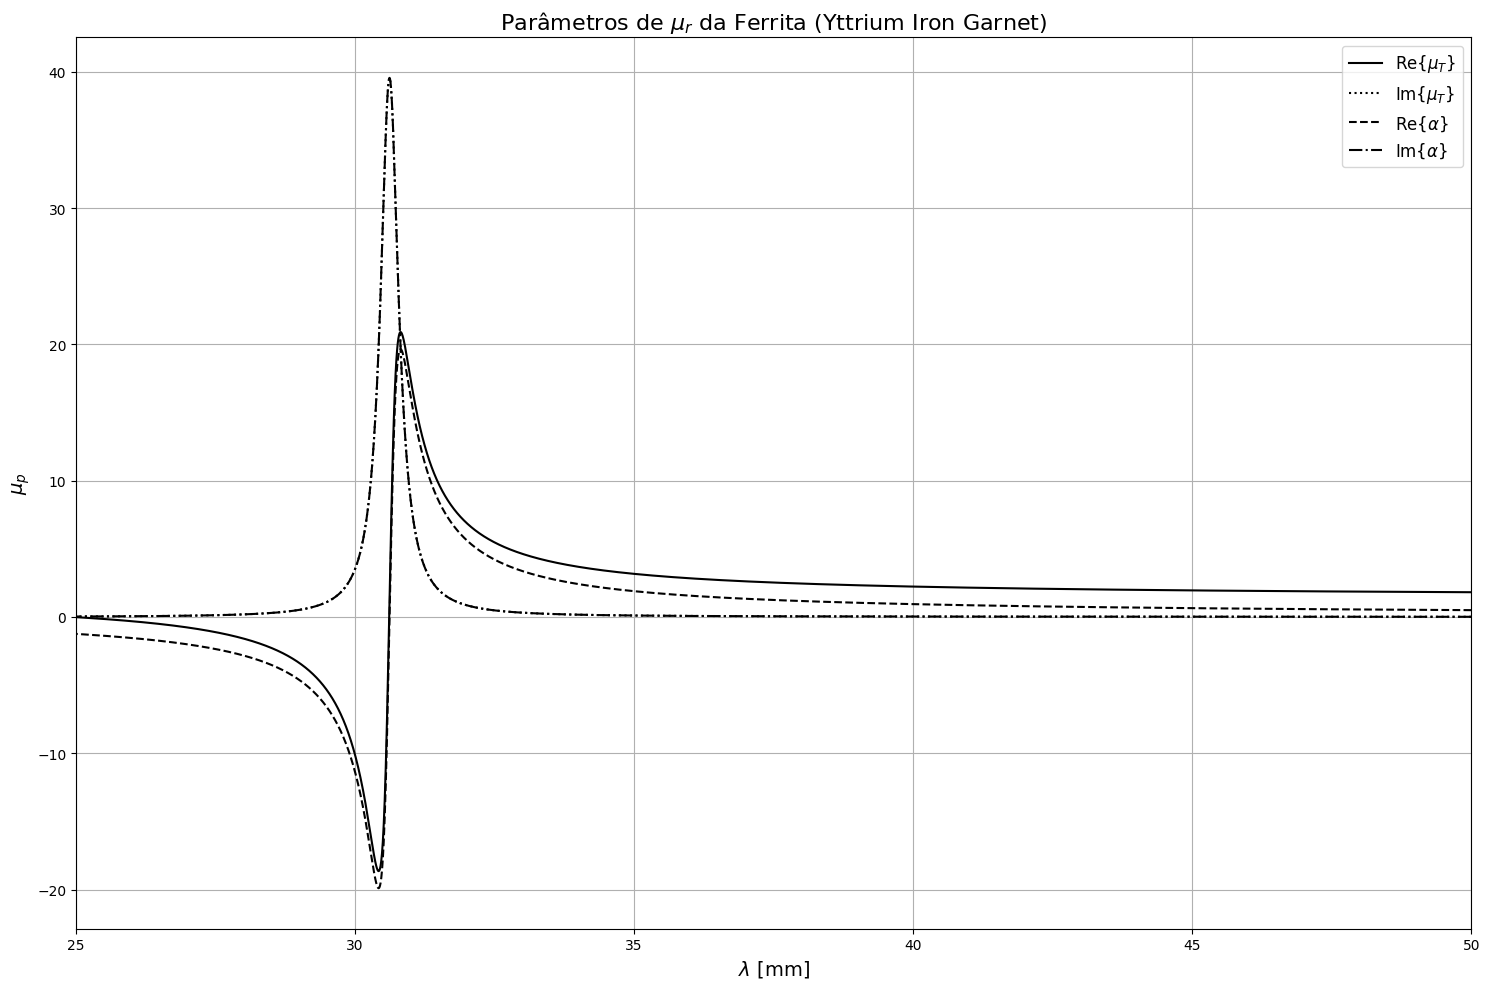

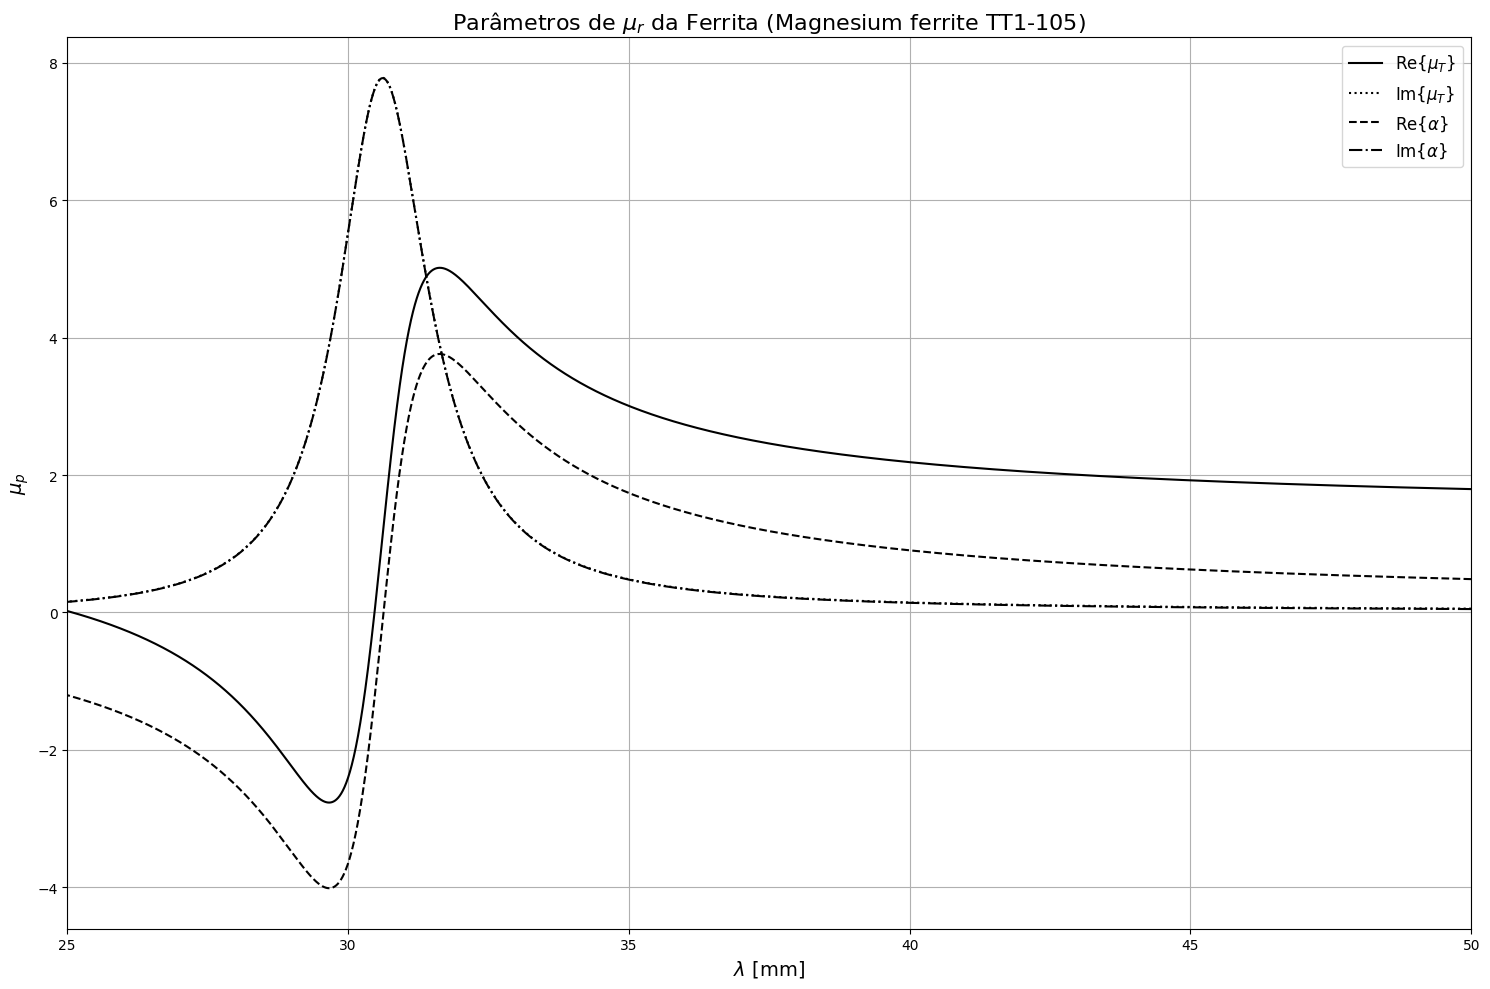

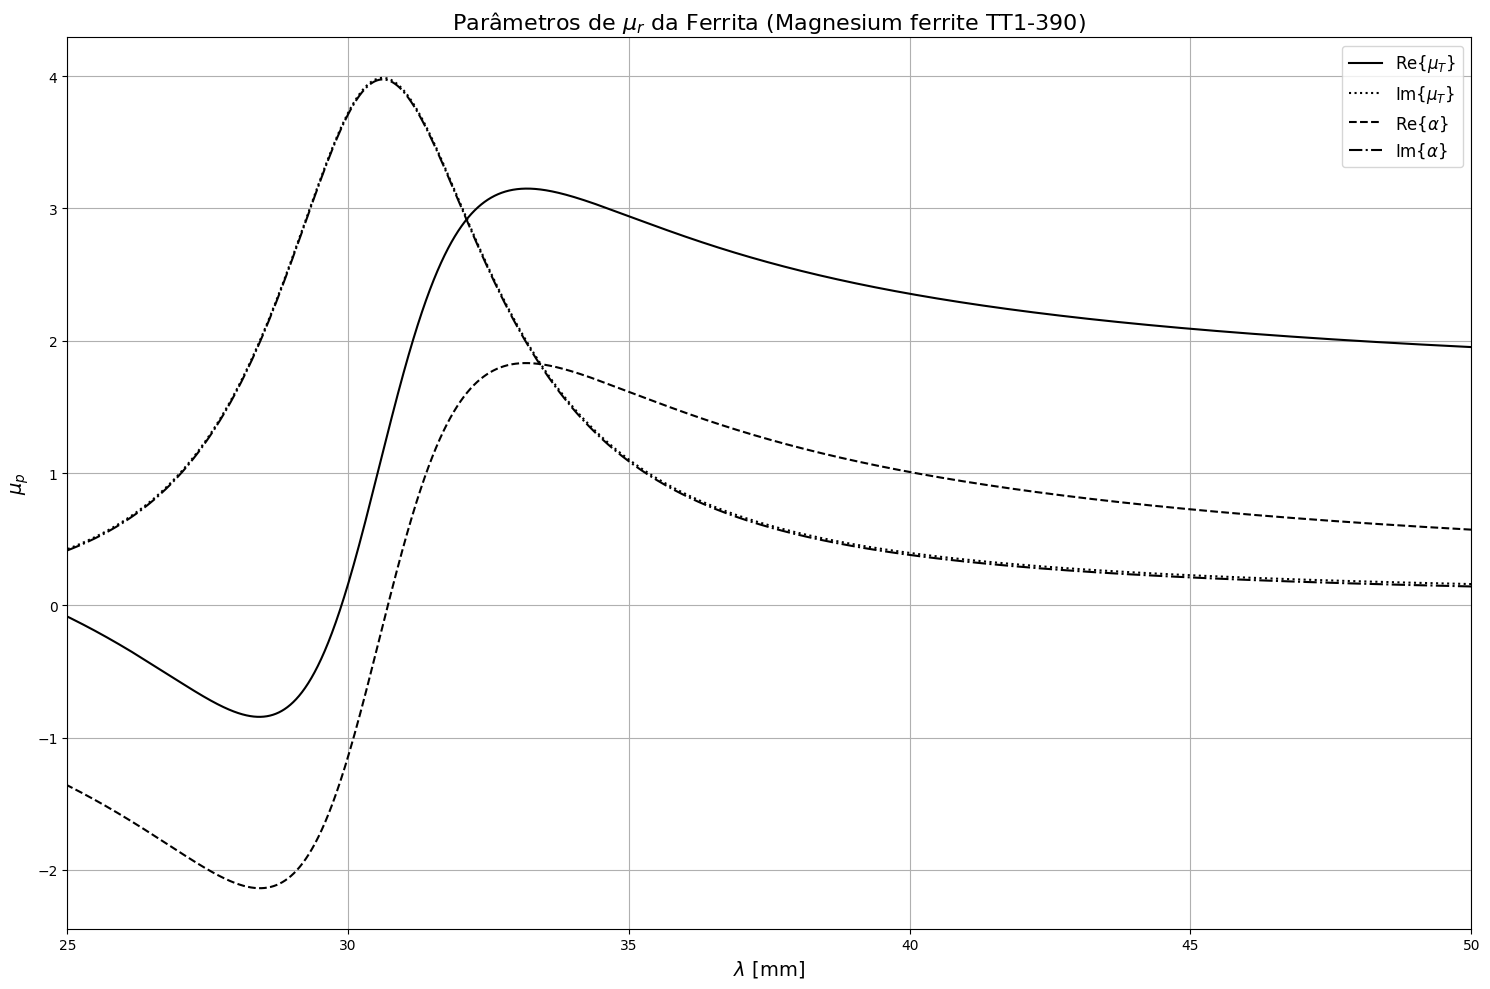

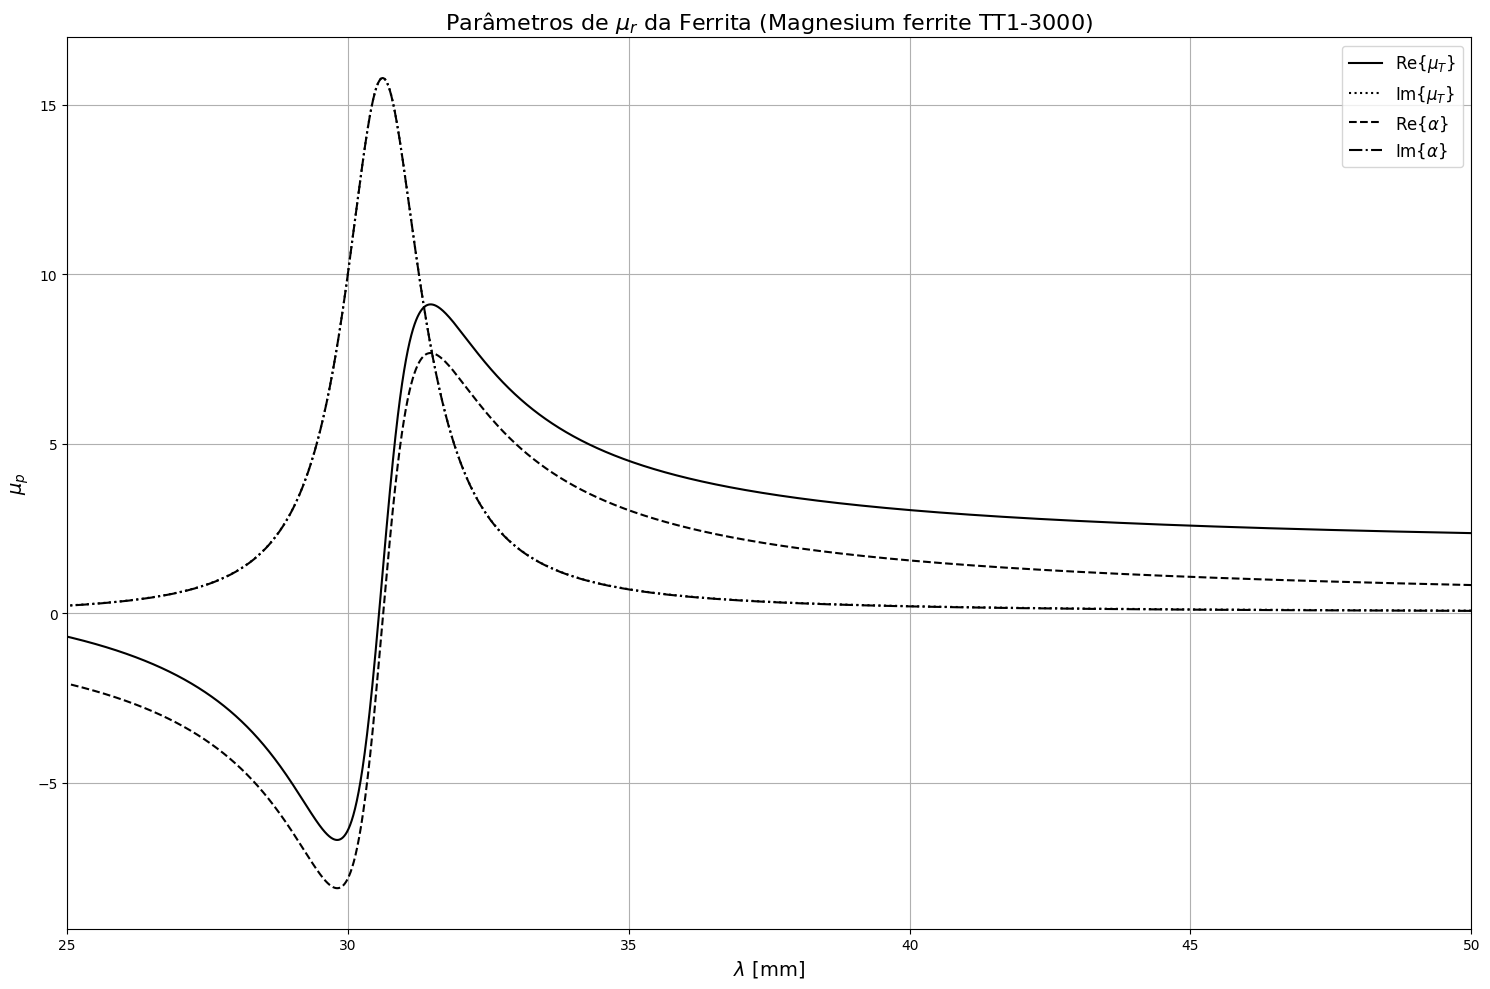

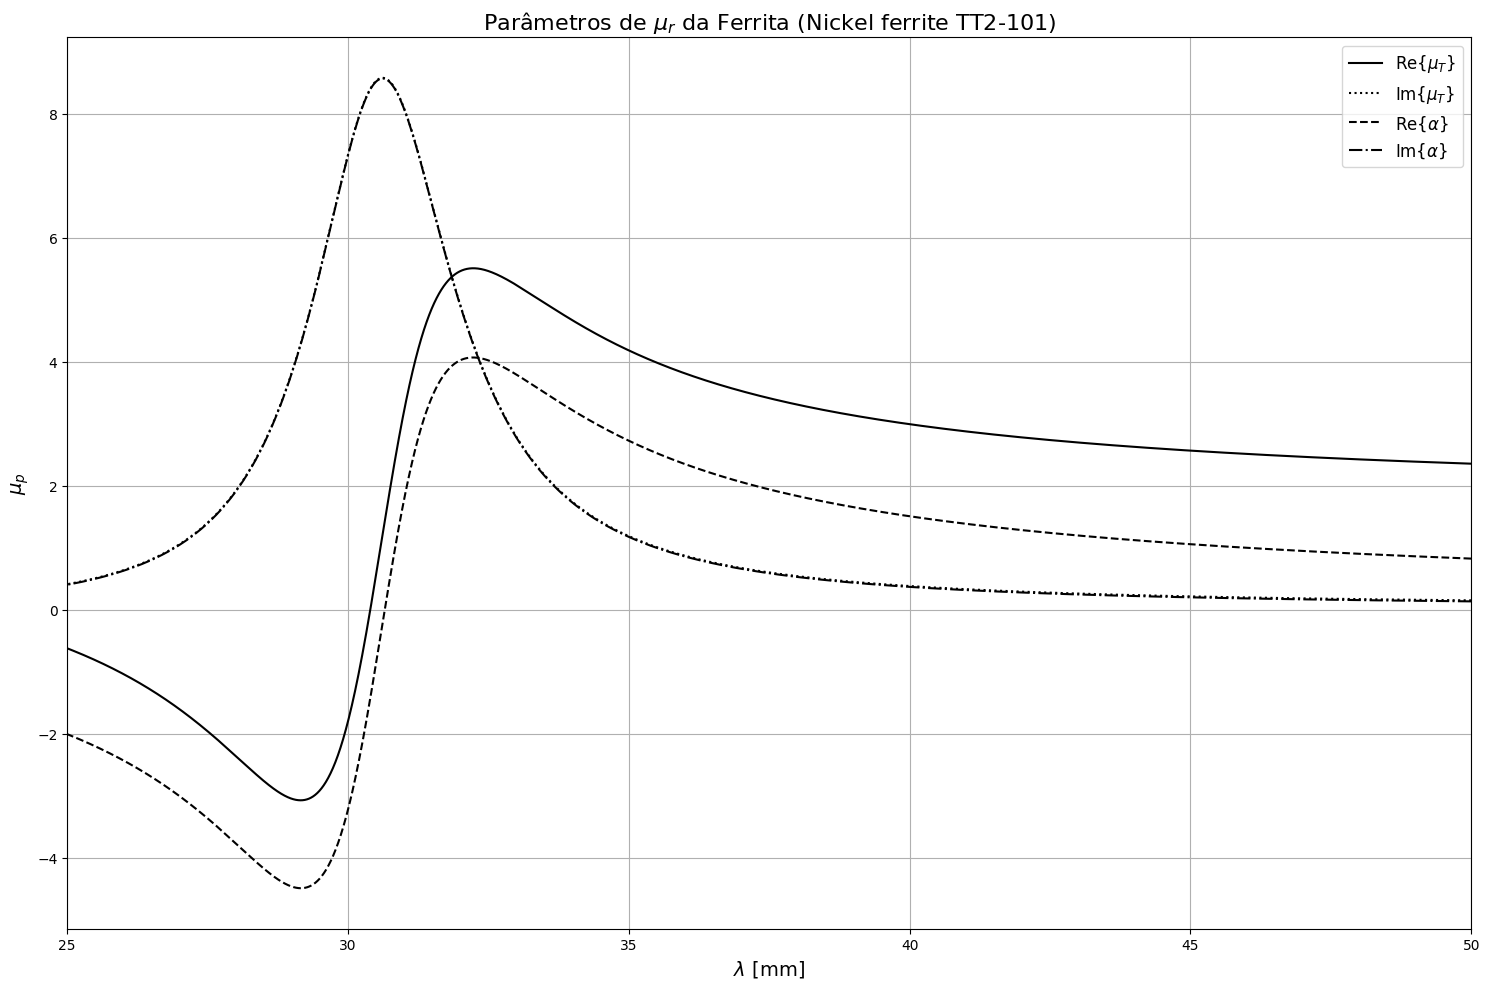

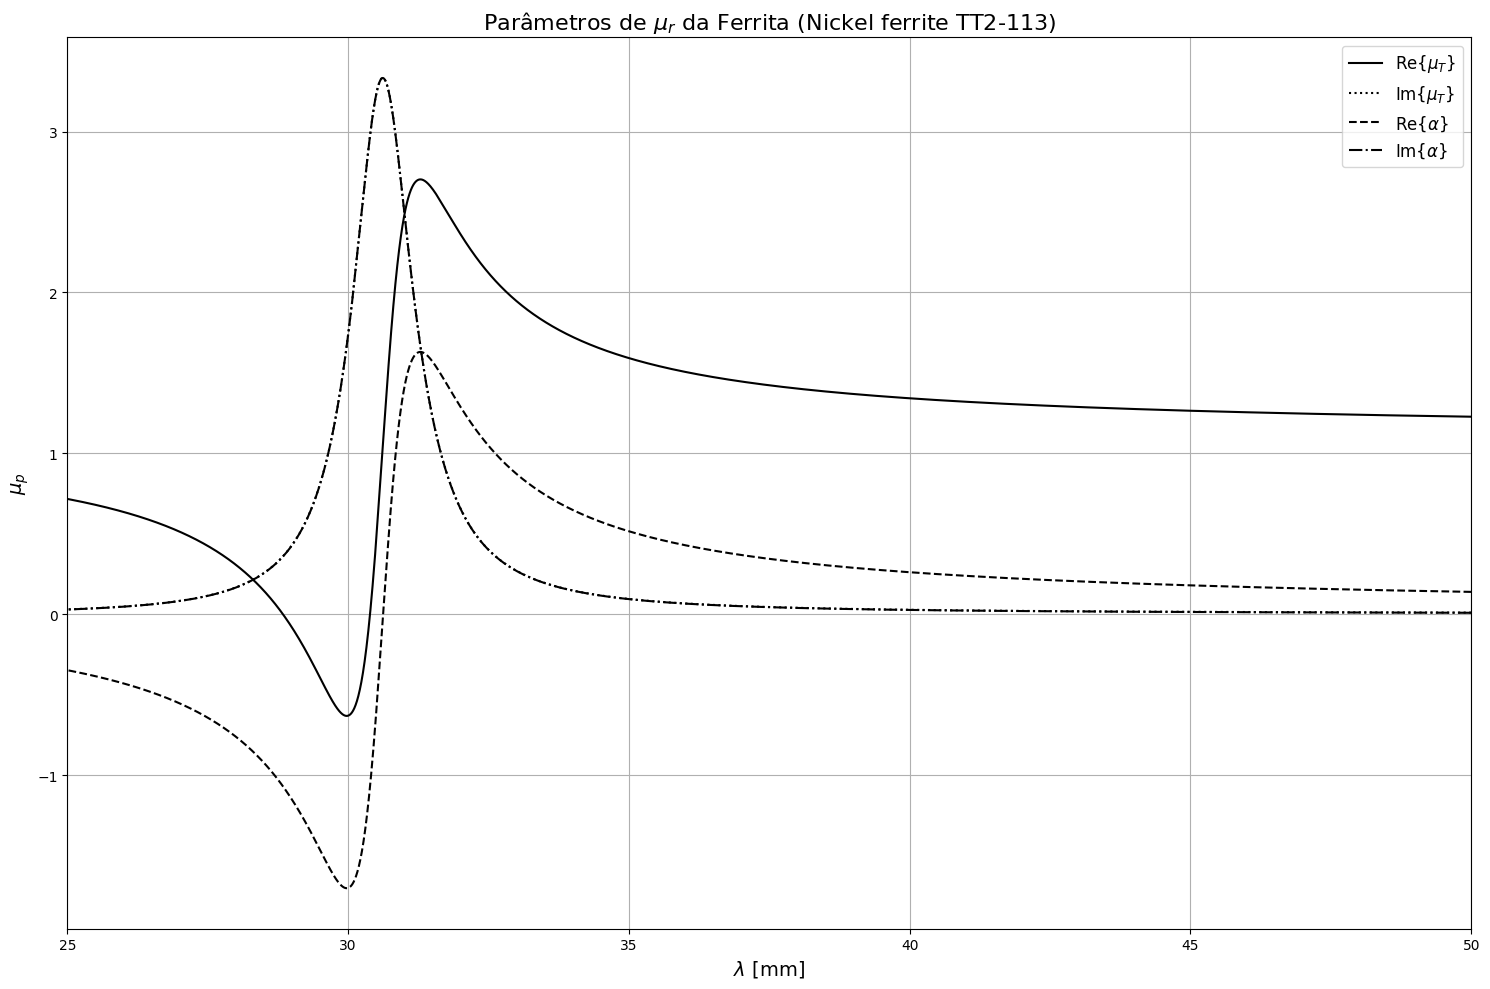

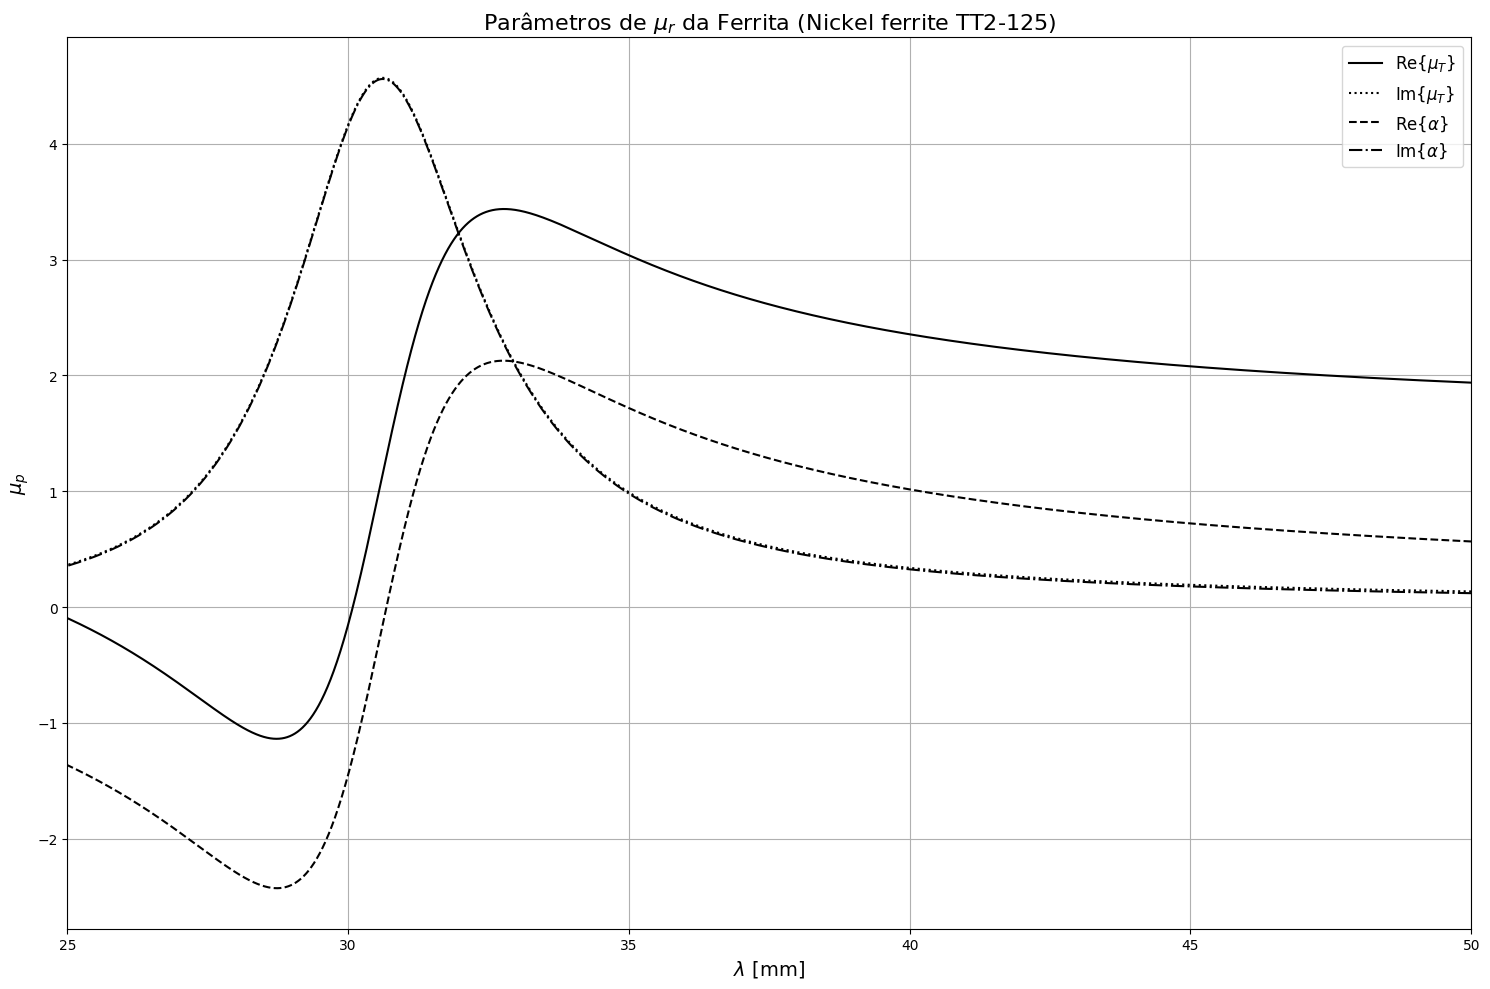

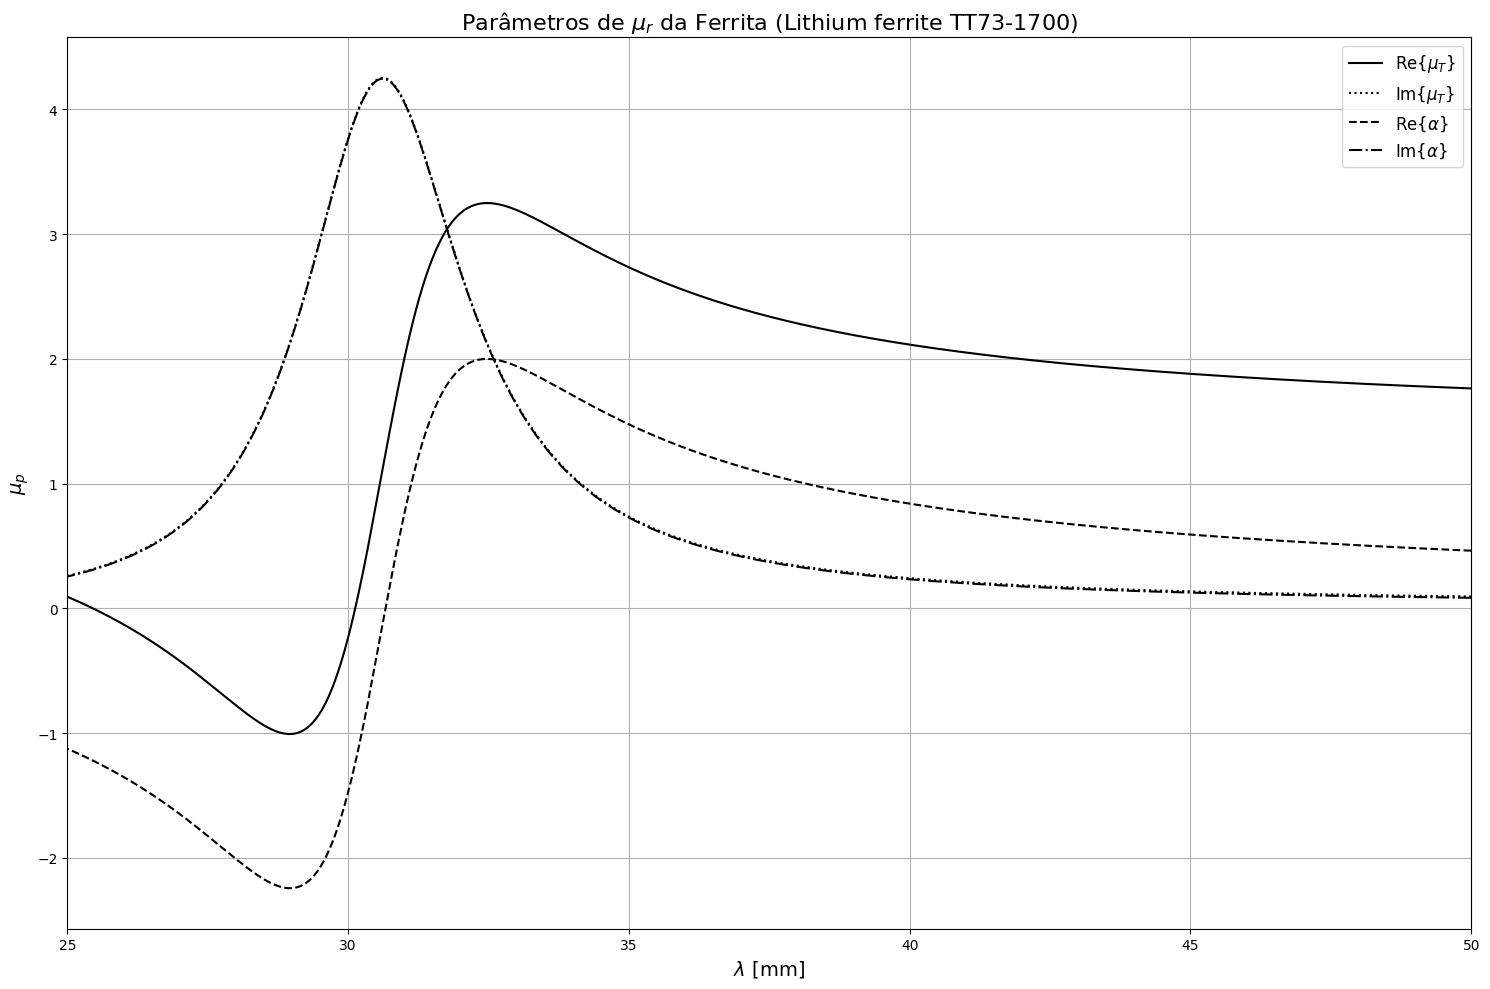

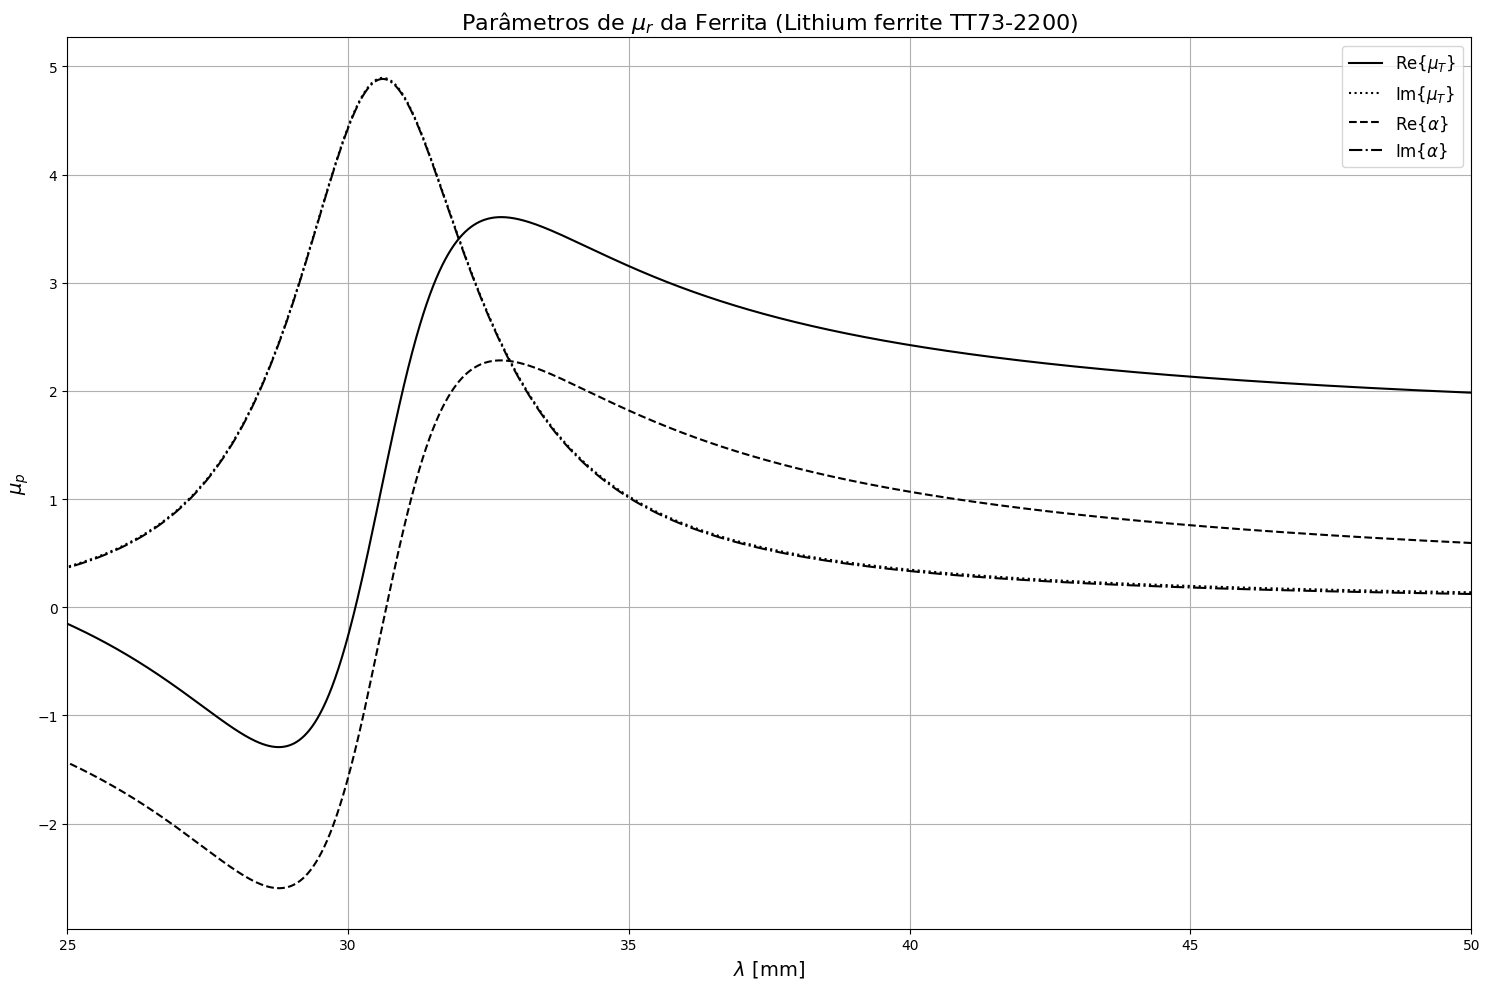

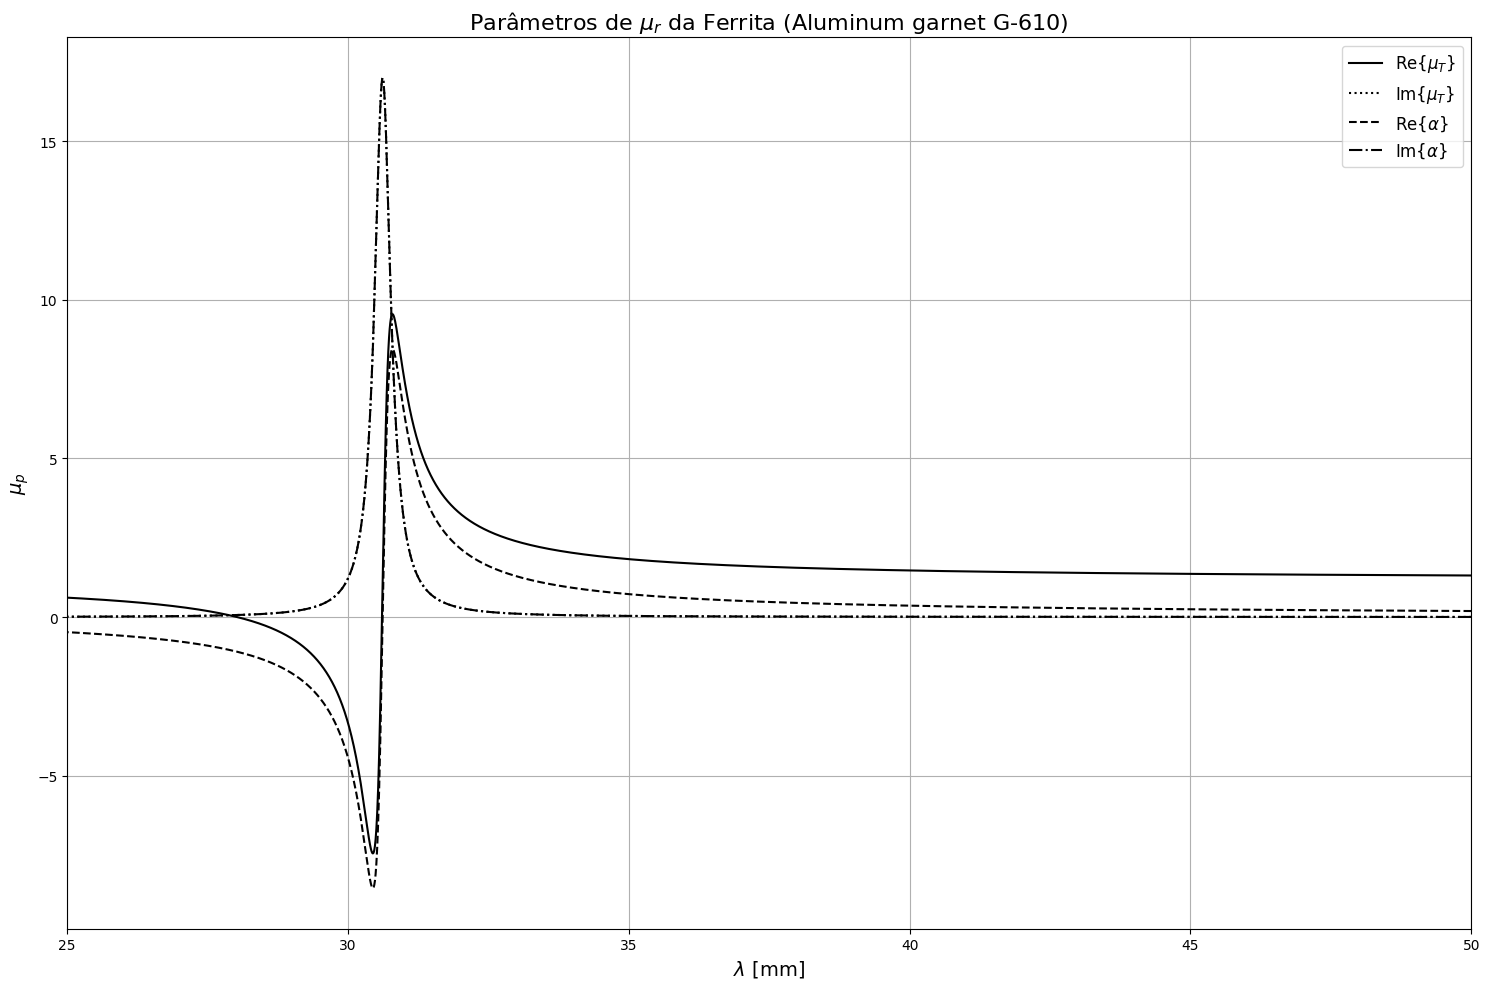

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Constantes
C = 3 * 10**8  # Velocidade da luz (m/s)
mi0 = 4 * np.pi * (10**(-7))  # Permeabilidade do vácuo
Gamma = 1.759 * (10**11)  # Gyromagnetic ratio (Ckg−1)


# Parâmetros dos materiais
materiais = {
    "Yttrium Iron Garnet": {
        "H0": 3500, "Delta_H": 45, "M0": 1780, "Mr": 1227, "Epsilon_p": 15, "tan_delta": 0.0002, "Tc": 225
    },
    "Magnesium ferrite TT1-105": {
        "H0": 3500, "Delta_H": 225, "M0": 1750, "Mr": 1220, "Epsilon_p": 12.2, "tan_delta": 0.00025, "Tc": 225
    },
    "Magnesium ferrite TT1-390": {
        "H0": 3500, "Delta_H": 540, "M0": 2150, "Mr": 1288, "Epsilon_p": 12.2, "tan_delta": 0.00025, "Tc": 320
    },
    "Magnesium ferrite TT1-3000": {
        "H0": 3500, "Delta_H": 190, "M0": 3000, "Mr": 2000, "Epsilon_p": 12.9, "tan_delta": 0.0005, "Tc": 320
    },
    "Nickel ferrite TT2-101": {
        "H0": 3500, "Delta_H": 350, "M0": 3000, "Mr": 1853, "Epsilon_p": 12.8, "tan_delta": 0.0025, "Tc": 585
    },
    "Nickel ferrite TT2-113": {
        "H0": 3500, "Delta_H": 150, "M0": 500, "Mr": 140, "Epsilon_p": 9, "tan_delta": 0.0008, "Tc": 120
    },
    "Nickel ferrite TT2-125": {
        "H0": 3500, "Delta_H": 460, "M0": 2100, "Mr": 1426, "Epsilon_p": 12.6, "tan_delta": 0.001, "Tc": 560
    },
    "Lithium ferrite TT73-1700": {
        "H0": 3500, "Delta_H": 400, "M0": 1700, "Mr": 1139, "Epsilon_p": 16.1, "tan_delta": 0.0025, "Tc": 460
    },
    "Lithium ferrite TT73-2200": {
        "H0": 3500, "Delta_H": 450, "M0": 2200, "Mr": 1474, "Epsilon_p": 15.8, "tan_delta": 0.0025, "Tc": 520
    },
    "Aluminum garnet G-610": {
        "H0": 3500, "Delta_H": 40, "M0": 680, "Mr": 515, "Epsilon_p": 14.5, "tan_delta": 0.0002, "Tc": 185
    }
}

# Conversão de unidades
def converter_parametros(material):
    material["H0"] = material["H0"] * (1 / (4 * np.pi * (10**(-3))))  # Convertendo H0 para A/m
    material["Delta_H"] = material["Delta_H"] * (1 / (4 * np.pi * (10**(-3))))  # Convertendo Delta_H para A/m
    material["M0"] = ((10**(-4)) / mi0) * (4 * np.pi) * material["M0"] / (4 * np.pi)  # Convertendo M0
    return material

# Definindo a faixa de frequências e calculando omega e Lambda
frequencia = np.linspace(6 * 10**9, 12 * 10**9, 100000)  # Faixa de 6 GHz a 12 GHz
omega = 2 * np.pi * frequencia  # Frequências angulares
Lambda = (C / frequencia) * 10**3  # Convertendo Lambda para milímetros

# Função para calcular parâmetros e gerar gráficos
def calcular_e_plotar(material, nome):
    material = converter_parametros(material)

    # Cálculo dos parâmetros
    b = mi0 * Gamma * material["Delta_H"] / (2 * omega)  # Constante de amortecimento adimensional
    omega_m = mi0 * Gamma * material["M0"]  # Frequência de magnetização
    omega_0 = mi0 * Gamma * material["H0"]  # Frequência de Larmor

    # Calculando os parâmetros com dependência de omega
    D = (((omega_0**2) - ((omega**2) * (1 + (b**2))))**2) + 4 * (omega_0**2) * (omega**2) * (b**2)
    X_1 = (omega_0 * omega_m * ((omega_0**2) - (omega**2) * (1 - (b**2)))) / D  # χ'
    X_2 = (omega * omega_m * b * ((omega_0**2) + (omega**2) * (1 + (b**2)))) / D  # χ''
    omega_1 = (omega * omega_m * ((omega_0**2) - (omega**2) * (1 + (b**2)))) / D  # Ω'
    omega_2 = (2 * (omega**2) * omega_0 * omega_m * b) / D  # Ω''

    # Definindo as variáveis complexas mi_T e alfa
    mi_T = 1 + X_1 + X_2 * 1j  # μ_T = 1 + χ' + iχ''
    alfa = omega_1 + omega_2 * 1j  # α = Ω' + iΩ''



    # Separando as partes reais e imaginárias
    mi_T_real = mi_T.real
    mi_T_imaginaria = mi_T.imag
    alfa_real = alfa.real
    alfa_imaginaria = alfa.imag

    # Gerando o gráfico das curvas
    plt.figure(figsize=(15, 10))

    # Plot das curvas com diferentes estilos de linha
    plt.plot(Lambda , mi_T_real, label=r'Re{$\mu_T$}', color='black', linestyle='solid', markersize=0.5)
    plt.plot(Lambda,mi_T_imaginaria, label=r'Im{$\mu_T$}', color='black', linestyle='dotted', markersize=10.5)
    plt.plot(Lambda, alfa_real, label=r'Re{$\alpha$}', color='black', linestyle='dashed',  markersize=0.5)
    plt.plot(Lambda, alfa_imaginaria, label=r'Im{$\alpha$}', color='black', linestyle='dashdot', markersize=0.5)

    # Configurações do gráfico
    plt.title(f'Parâmetros de $\mu_r$ da Ferrita ({nome})', fontsize=16)
    plt.xlabel('$\\lambda$ [mm]', fontsize=14)
    plt.ylabel('$\mu_p$', fontsize=14)
    plt.xlim([25, 50])
    #plt.ylim([-21, 41])  # Ajustar a escala se necessário
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Loop para gerar gráficos para todos os materiais
for nome, params in materiais.items():
    calcular_e_plotar(params, nome)
